##Comprehensive Report on Airplane Incidents: Passengers Aboard, Fatalities, and Ground Deaths

This report provides a comprehensive analysis of aviation crash and fatality data, focusing on key metrics including the total number of passengers aboard, fatalities, and ground deaths. The data covers various aspects of air travel safety, offering insights into the overall impact of aviation incidents.

In [1]:
# Loading important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Importing dataset into df (data frame)

In [2]:
df = pd.read_csv("/content/AirPlane_Crash_WorldWide_Data_Report.csv")
df2 = pd.read_csv("/content/Airplane_Crashes_and_Fatalities_Since_1908.csv")


,Year,Number of Crashes,Fatal Injuries,Serious Injuries,Minor Injuries
0,1982,3593,1585,727,998
1,1983,3556,1273,673,1048
2,1984,3457,1229,697,1047
3,1985,3096,1648,612,1108
4,1986,2880,1180,619,970


In [76]:
df.head()

,Year,Number of Crashes,Fatal Injuries,Serious Injuries,Minor Injuries
0,1982,3593,1585,727,998
1,1983,3556,1273,673,1048
2,1984,3457,1229,697,1047
3,1985,3096,1648,612,1108
4,1986,2880,1180,619,970


In [3]:
df.tail()

,Year,Number of Crashes,Fatal Injuries,Serious Injuries,Minor Injuries
34,2016,1628,835,297,468
35,2017,1597,677,295,401
36,2018,1581,847,331,437
37,2019,640,477,120,129
38,Total,83374,47719,17862,28607


In [77]:
df2.head()

,Month,Year,Location,Operator,Type,Aboard,Fatalities,Ground
0,9,1908,"Fort Myer, Virginia",Military - U.S. Army,Wright Flyer III,2,1,0
1,7,1912,"AtlantiCity, New Jersey",Military - U.S. Navy,Dirigible,5,5,0
2,8,1913,"Victoria, British Columbia, Canada",Private,Curtiss seaplane,1,1,0
3,9,1913,Over the North Sea,Military - German Navy,Zeppelin L-1 (airship),20,14,0
4,10,1913,"Near Johannisthal, Germany",Military - German Navy,Zeppelin L-2 (airship),30,30,0


In [79]:
df2.tail()

,Month,Year,Location,Operator,Type,Aboard,Fatalities,Ground
5174,5,2009,"Near El Alto de Rubio, Venezuela",Military - Venezuelan Army,Mi-35,18,18,0
5175,5,2009,"Near Madiun, Indonesia",Military - Indonesian Air Force,Lockheed C-130 Hercules,112,98,2
5176,6,2009,"AtlantiOcean, 570 miles northeast of Natal, Br...",Air France,Airbus A330-203,228,228,0
5177,6,2009,"Near Port Hope Simpson, Newfoundland, Canada",Strait Air,Britten-Norman BN-2A-27 Islander,1,1,0
5178,6,2009,"State of Arunachal Pradesh, India",Military - Indian Air Force,Antonov An-32,13,13,0


In [78]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5179 entries, 0 to 5178
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Month       5179 non-null   int64 
 1   Year        5179 non-null   int64 
 2   Location    5179 non-null   object
 3   Operator    5179 non-null   object
 4   Type        5179 non-null   object
 5   Aboard      5179 non-null   int64 
 6   Fatalities  5179 non-null   int64 
 7   Ground      5179 non-null   int64 
dtypes: int64(5), object(3)
memory usage: 323.8+ KB


##Cleaning Data

In [4]:
df = df.drop(index=38)

In [5]:
df.tail()

,Year,Number of Crashes,Fatal Injuries,Serious Injuries,Minor Injuries
33,2015,1600,1112,364,473
34,2016,1628,835,297,468
35,2017,1597,677,295,401
36,2018,1581,847,331,437
37,2019,640,477,120,129


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Year               38 non-null     object
 1   Number of Crashes  38 non-null     int64 
 2   Fatal Injuries     38 non-null     int64 
 3   Serious Injuries   38 non-null     int64 
 4   Minor Injuries     38 non-null     int64 
dtypes: int64(4), object(1)
memory usage: 1.6+ KB


Data Visualization

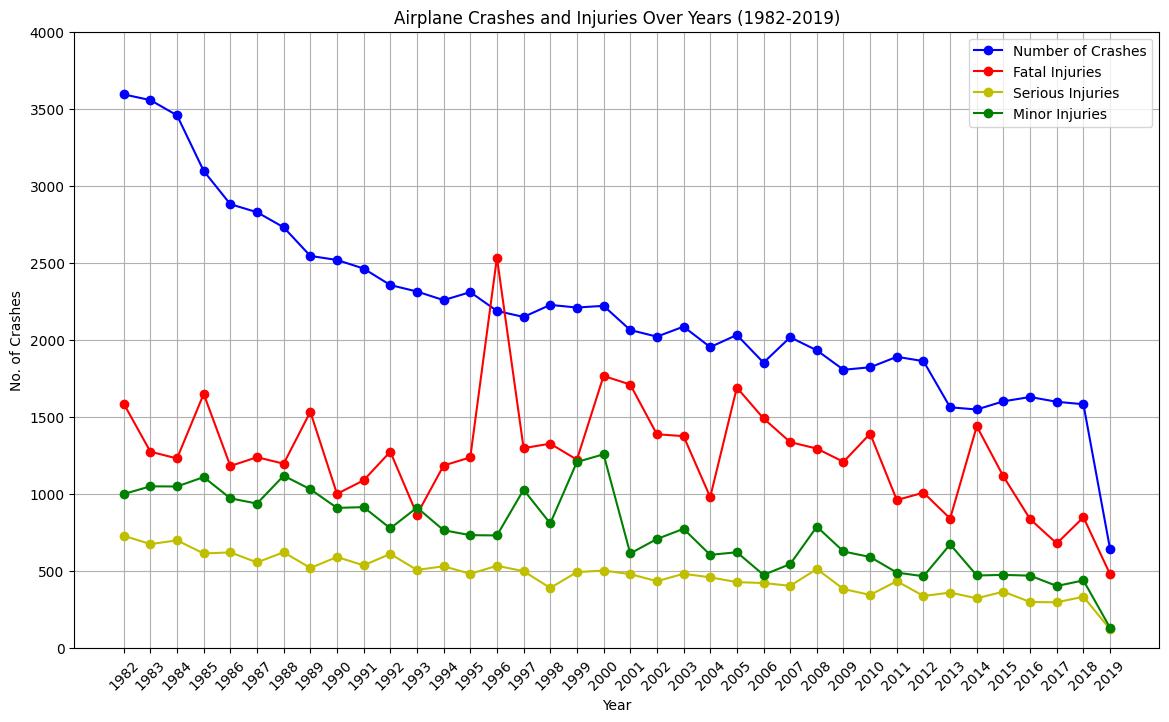

In [7]:
# Plotting
plt.figure(figsize=(14, 8))
plt.plot(df['Year'], df['Number of Crashes'], marker='o', label='Number of Crashes', color='b')
plt.plot(df['Year'], df['Fatal Injuries'], marker='o', label='Fatal Injuries', color='r')
plt.plot(df['Year'], df['Serious Injuries'], marker='o', label='Serious Injuries', color='y')
plt.plot(df['Year'], df['Minor Injuries'], marker='o', label='Minor Injuries', color='g')

plt.xlabel('Year')
plt.ylabel('No. of Crashes')
plt.title('Airplane Crashes and Injuries Over Years (1982-2019)')
plt.ylim(0, 4000)
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()


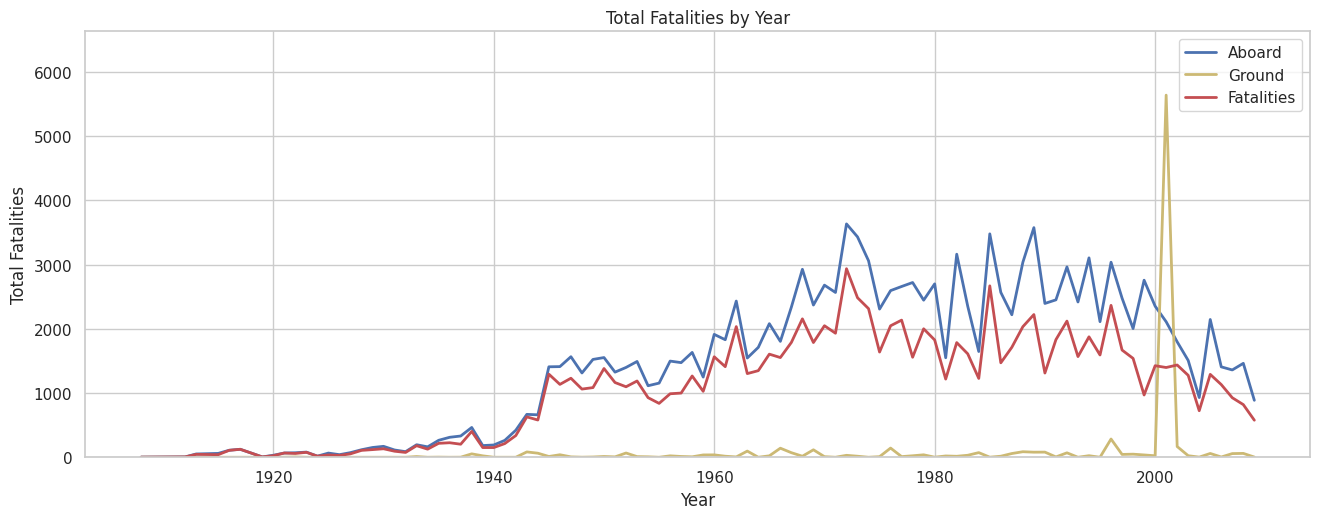

In [74]:
# Plotting
year_totals = df2.groupby('Year').agg({
    'Aboard': 'sum',
    'Fatalities': 'sum',
    'Ground': 'sum'
}).reset_index()

plt.figure(figsize=(14, 6))

plt.plot(year_totals['Year'], year_totals['Aboard'], color='b', linestyle='-', linewidth=2, markersize=8)
plt.plot(year_totals['Year'], year_totals['Ground'], color='y', linestyle='-', linewidth=2, markersize=8)
plt.plot(year_totals['Year'], year_totals['Fatalities'], color='r', linestyle='-', linewidth=2, markersize=8)
plt.title('Total Fatalities by Year')
plt.xlabel('Year')
plt.ylabel('Total Fatalities')
plt.legend(['Aboard', 'Ground', 'Fatalities'])
plt.ylim(0, year_totals['Aboard'].max() + 3000)
plt.xticks()
plt.grid(True)

plt.tight_layout(pad=3.0)
plt.show()

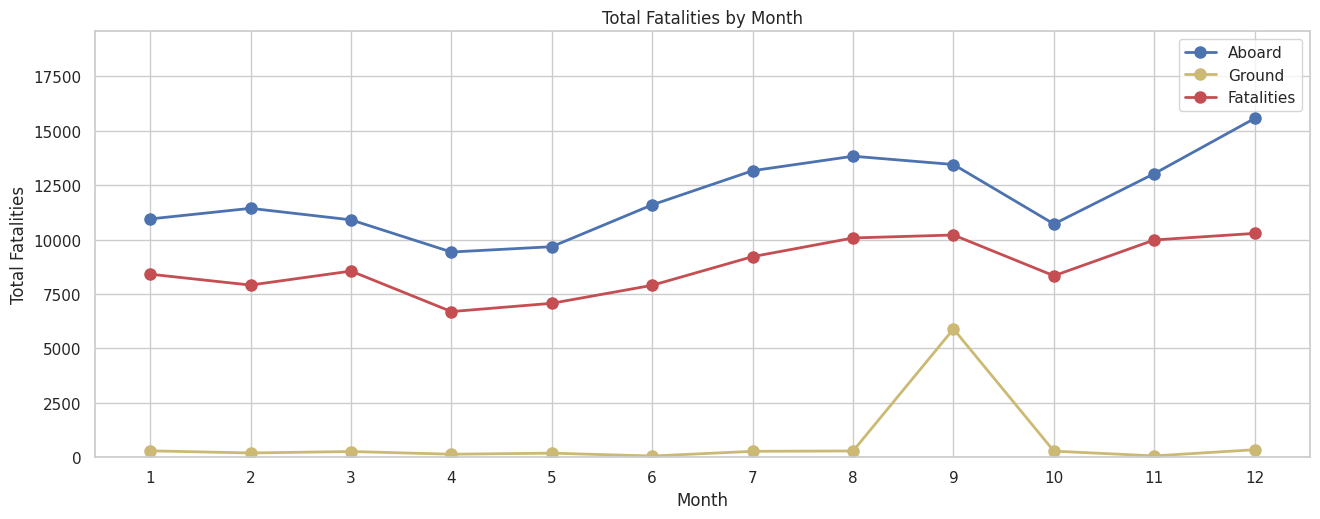

In [80]:
# Plotting
monthly_totals = df2.groupby('Month').agg({
    'Aboard': 'sum',
    'Fatalities': 'sum',
    'Ground': 'sum'
}).reset_index()

plt.figure(figsize=(14, 6))

plt.plot(monthly_totals['Month'], monthly_totals['Aboard'], marker='o', color='b', linestyle='-', linewidth=2, markersize=8)
plt.plot(monthly_totals['Month'], monthly_totals['Ground'], marker='o', color='y', linestyle='-', linewidth=2, markersize=8)
plt.plot(monthly_totals['Month'], monthly_totals['Fatalities'], marker='o', color='r', linestyle='-', linewidth=2, markersize=8)
plt.title('Total Fatalities by Month')
plt.legend(['Aboard', 'Ground', 'Fatalities'])
plt.xlabel('Month')
plt.ylabel('Total Fatalities')
plt.ylim(0, monthly_totals['Aboard'].max() + 4000)
plt.xticks(range(1, 13))
plt.grid(True)

plt.tight_layout(pad=3.0)
plt.show()

##Conclusion

In reflecting upon the data presented in this report, we are reminded of the profound impact of aviation incidents on lives and communities. Each statistic represents more than just numbers; they are poignant reminders of the lives lost and the profound grief experienced by families and loved ones.

The analysis of total passengers aboard, fatalities, and ground deaths underscores the serious consequences of aviation accidents. While data provides us with a window into these tragic events, it is essential to approach this information with empathy and respect for those affected. Each incident carries with it a story of loss and a testament to the resilience of those who endure.

Our commitment to improving aviation safety and reducing the risk of such tragedies is driven by the memories of those we have lost. Let us honor their legacy by continuing to strive for advancements in safety, ensuring that their stories lead to meaningful change and contribute to a safer future for all.

In memory of the individuals who have lost their lives, we express our deepest condolences and remain dedicated to the pursuit of aviation excellence, guided by the lessons learned from their stories.

